In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Salary_cleaned.csv")

In [4]:
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,...,Company_Title,State,HeadQuarter_in_jobState,age,python,r_sto,spark,aws,sql,oracle
0,Data Scientist,"['53', '91']","Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research,NM,0,47,1,0,0,0,0,0
1,Healthcare Data Scientist,"['63', '112']",What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System,MD,0,36,1,0,0,0,0,0
2,Data Scientist,"['80', '90']","KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4,FL,1,10,1,0,1,0,1,0
3,Data Scientist,"['56', '97']",*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL,WA,1,55,1,0,0,0,0,0
4,Data Scientist,"['86', '143']",Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions,NY,1,22,1,0,0,0,1,0


In [5]:
def title_change(title):
    if "data scientist"   in title.lower():
        return "Data Scientist"
    elif "data engineer" in title.lower():
        return "Data Engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "ml"
    elif "director" in title.lower():
        return "director"
    elif "manager" in title.lower():
        return "manager"
    else:
        return 'na'
    
def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or"lead" in title.lower() or"principal" in title.lower():
        return "senior"
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [6]:
df['JobSimp']=df['Job_Title'].apply(title_change)

In [7]:
df.JobSimp.value_counts()


Data Scientist    279
na                184
Data Engineer     119
analyst           102
ml                 22
manager            22
director           14
Name: JobSimp, dtype: int64

In [8]:
df['seniority']=df['Job_Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
df.State.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 WI              10
 UT              10
 IN              10
 MO               9
 AZ               9
 AL               8
 KY               6
 GA               6
 MI               6
 DE               6
 IA               5
 CT               5
 OR               4
 NE               4
 LA               4
 NM               3
 KS               3
 ID               2
 MN               2
 RI               1
 SC               1
 Los Angeles      1
Name: State, dtype: int64

In [11]:
df['State'] = df['State'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [12]:
df['JobDescrip_len']=df.Job_Description.apply(lambda x: len(x))
df.JobDescrip_len

0      2555
1      4828
2      3495
3      3926
4      2748
5      3783
6      1808
7      3847
8      1561
9      4609
10     2789
11     3522
12     3980
13     4942
14     3799
15     1902
16     3676
17     4201
18     3549
19     4434
20     2944
21     6967
22     6472
23     2951
24     3806
25     3728
26     4452
27     4984
28     5057
29     3495
       ... 
712    3761
713    3809
714    2352
715    7209
716    3943
717    2895
718    2331
719    6255
720    3841
721    2504
722    5374
723    3299
724    1866
725    7444
726    3401
727    3721
728    4654
729    4755
730    3334
731    2786
732    3526
733    5777
734    5071
735    3849
736    5064
737    6219
738    6167
739    3107
740    1678
741    3710
Name: JobDescrip_len, Length: 742, dtype: int64

In [13]:
df.columns


Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min_salary', 'Max_salary', 'avg_salary', 'Company_Title', 'State',
       'HeadQuarter_in_jobState', 'age', 'python', 'r_sto', 'spark', 'aws',
       'sql', 'oracle', 'JobSimp', 'seniority', 'JobDescrip_len'],
      dtype='object')

In [14]:
df.Min_salary[df.Min_salary <20]

165    17
197    18
210    15
240    15
246    17
337    18
409    10
492    18
618    10
666    18
Name: Min_salary, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x1f43b4a8f60>],
 'caps': [<matplotlib.lines.Line2D at 0x1f43b4b69b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f43b694668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f43b694240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f43b4b60f0>,
  <matplotlib.lines.Line2D at 0x1f43b4b6588>]}

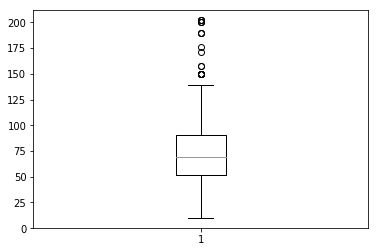

In [15]:
import matplotlib.pyplot as plt
plt.boxplot(df['Min_salary'])


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 30 columns):
Job_Title                  742 non-null object
Salary_Estimate            742 non-null object
Job_Description            742 non-null object
Rating                     742 non-null float64
Company_Name               742 non-null object
Location                   742 non-null object
Headquarters               742 non-null object
Size                       742 non-null object
Founded                    742 non-null int64
Type_of_ownership          742 non-null object
Industry                   742 non-null object
Sector                     742 non-null object
Revenue                    742 non-null object
Competitors                742 non-null object
Min_salary                 742 non-null int64
Max_salary                 742 non-null int64
avg_salary                 742 non-null float64
Company_Title              742 non-null object
State                      742 non-null object
Hea

In [17]:
df.describe()


,Rating,Founded,Min_salary,Max_salary,avg_salary,HeadQuarter_in_jobState,age,python,r_sto,spark,aws,sql,oracle,JobDescrip_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.512129,0.053908,3910.172507
std,0.801210,497.183763,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.500190,0.225989,1533.827777
min,-1.000000,-1.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000
25%,3.300000,1939.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000
50%,3.700000,1988.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3781.500000
75%,4.000000,2007.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4772.000000
max,5.000000,2019.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000


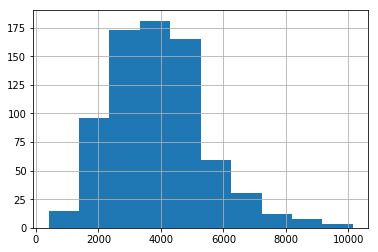

In [18]:
df.JobDescrip_len.hist()

In [19]:
import seaborn as sns 
import numpy as np
corr=df[['age','Rating','JobDescrip_len','avg_salary']].corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

In [20]:
cmap= sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)


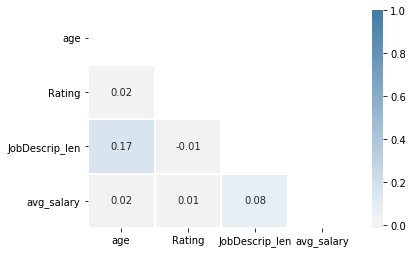

In [21]:
sns.heatmap(df[['age','Rating','JobDescrip_len','avg_salary']].corr(),mask=mask,center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f')

In [22]:
cols=df.columns
num_cols=df._get_numeric_data().columns

In [23]:
list(set(cols)-set(num_cols))

['Company_Title',
 'seniority',
 'Company_Name',
 'Industry',
 'Salary_Estimate',
 'Size',
 'Job_Title',
 'Competitors',
 'JobSimp',
 'Sector',
 'State',
 'Type_of_ownership',
 'Revenue',
 'Job_Description',
 'Location',
 'Headquarters']

In [24]:
df.Size.head()

0     501 to 1000 employees
1          10000+ employees
2     501 to 1000 employees
3    1001 to 5000 employees
4       51 to 200 employees
Name: Size, dtype: object

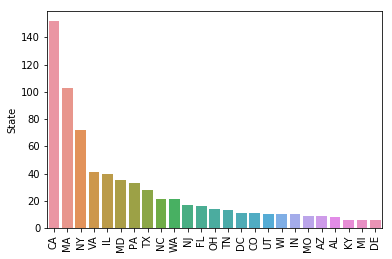

In [25]:
import seaborn as sns 
chart=sns.barplot(x=df.State.value_counts()[:25].index,y=df.State.value_counts()[:25])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [26]:
pd.set_option('display.max_rows',None)

In [27]:
import pandas as pd
pd.pivot_table(df,index=['State','JobSimp'],values='avg_salary').sort_values('avg_salary',ascending= False)


,,avg_salary
State,JobSimp,
IL,director,221.750000
CA,ml,177.300000
NJ,director,161.500000
DC,Data Scientist,149.000000
CA,Data Scientist,142.522059
UT,Data Scientist,140.500000
IL,ml,133.000000
CA,Data Engineer,129.540000
MO,Data Scientist,127.666667


In [28]:
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,...,age,python,r_sto,spark,aws,sql,oracle,JobSimp,seniority,JobDescrip_len
0,Data Scientist,"['53', '91']","Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,0,0,Data Scientist,na,2555
1,Healthcare Data Scientist,"['63', '112']",What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,0,Data Scientist,na,4828
2,Data Scientist,"['80', '90']","KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,0,Data Scientist,na,3495
3,Data Scientist,"['56', '97']",*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,0,Data Scientist,na,3926
4,Data Scientist,"['86', '143']",Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,0,Data Scientist,na,2748


In [32]:
df.to_csv("Data_exp.csv")